In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

/home/manoel/anaconda3/envs/urbansound/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def evaluate_model(model, X_train, y_train, X_test, y_test, classes):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall    = metrics.recall_score(y_test, y_pred, average='macro')
    f1_score  = metrics.f1_score(y_test, y_pred, average='macro')

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1_score)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred).astype(float)
    total_per_row = confusion_matrix.astype(float).sum(axis=1)
    cm = np.zeros(confusion_matrix.shape)

    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm[i][j] = confusion_matrix[i][j] / total_per_row[i]

    fig, ax = plt.subplots(figsize=(20,10))

    sns.heatmap(cm, annot=True, fmt='.2%', cbar=False)
    ax.set_yticklabels(classes)
    ax.set_xticklabels(classes)
    plt.yticks(rotation=0)
    plt.show()

In [3]:
X = np.load('X.npy')
y = np.load('y.npy')

In [4]:
classes = np.unique(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
del X, y

In [7]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6985, 40) (1747, 40)
(6985,) (1747,)


In [8]:
dt  = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb  = GaussianNB()
svc = SVC()
rf  = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()

Accuracy: 0.6891814539210075
Precision: 0.6885269263167033
Recall: 0.6773129659752682
F1-Score: 0.6812006269246564


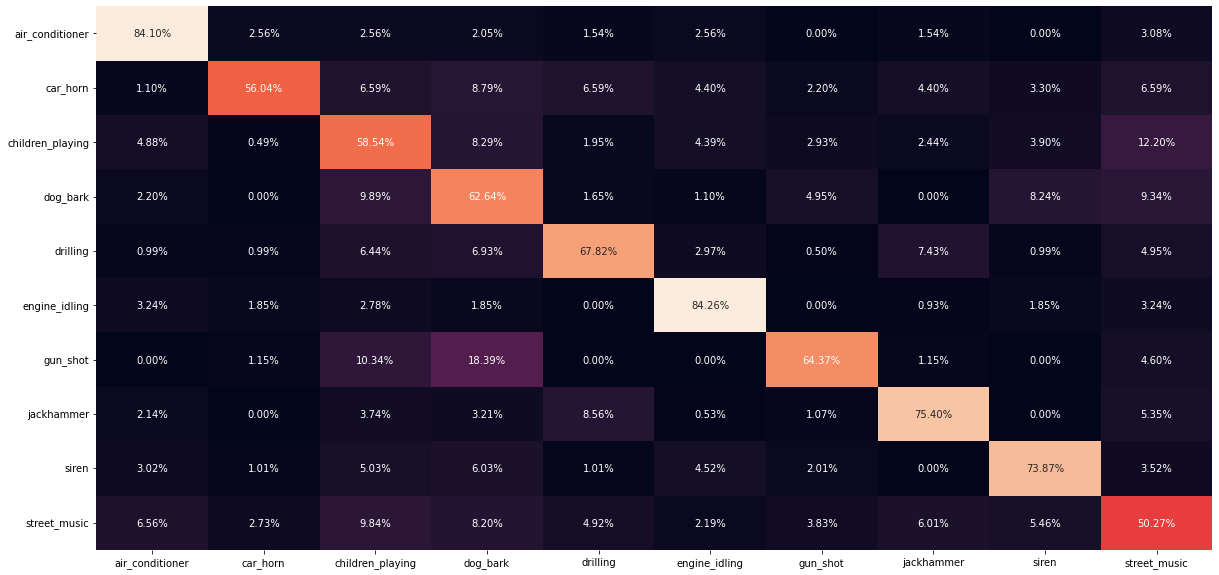

In [9]:
evaluate_model(dt, X_train, y_train, X_test, y_test, classes)

Accuracy: 0.8431597023468803
Precision: 0.854838981308989
Recall: 0.8202723022456018
F1-Score: 0.8278478249840967


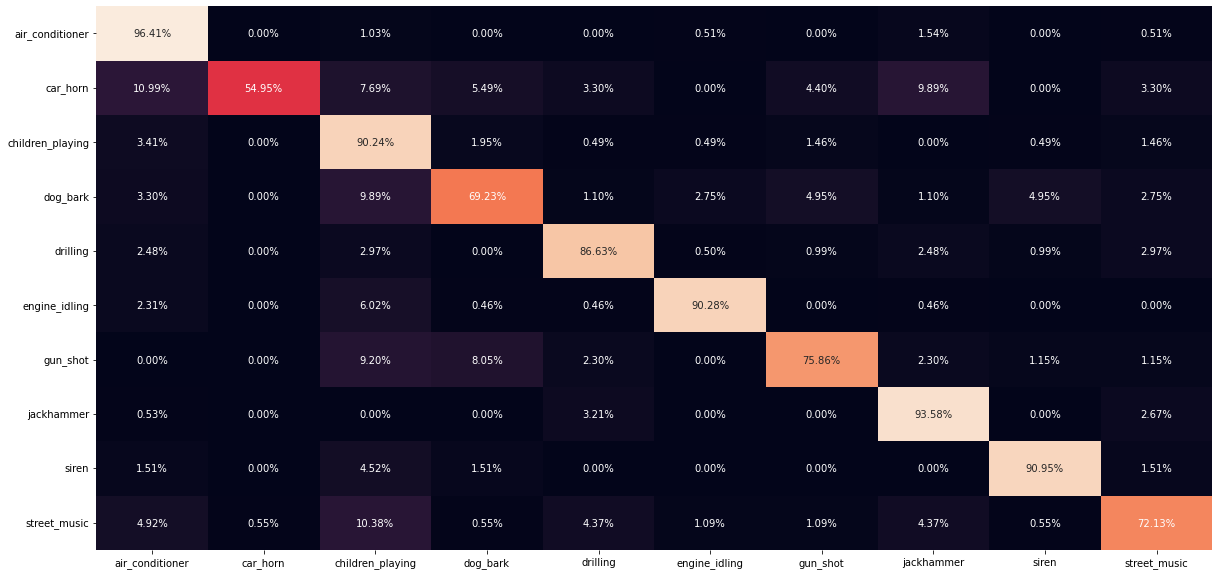

In [10]:
evaluate_model(knn, X_train, y_train, X_test, y_test, classes)

Accuracy: 0.4762449914138523
Precision: 0.4982242376927693
Recall: 0.4950977430937279
F1-Score: 0.48180116078856655


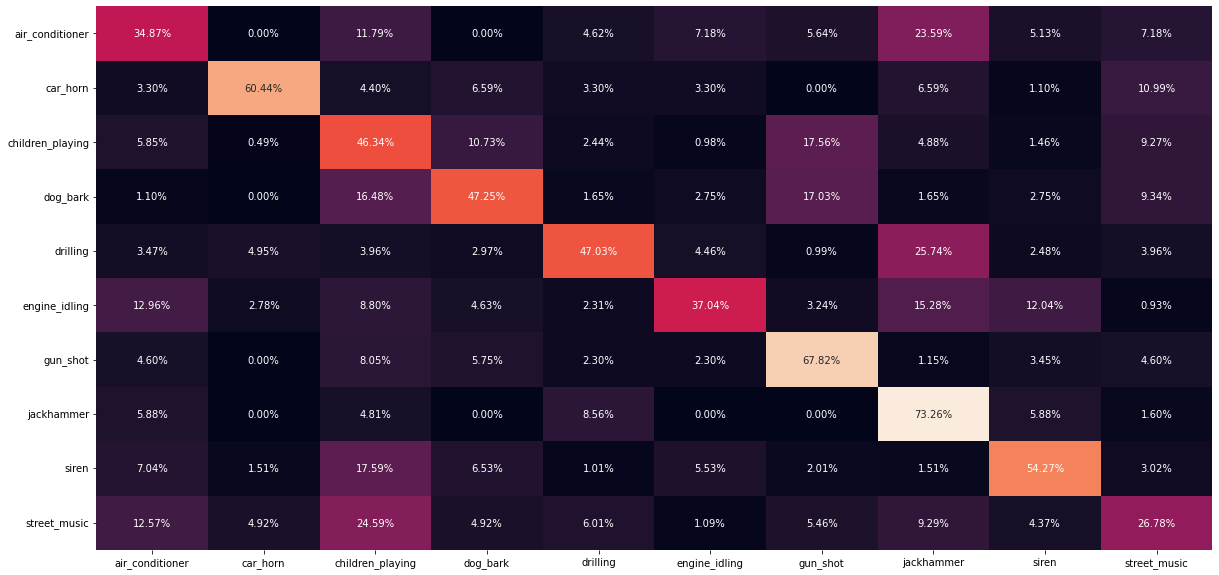

In [11]:
evaluate_model(nb, X_train, y_train, X_test, y_test, classes)

Accuracy: 0.614768174012593
Precision: 0.6799319489875585
Recall: 0.5894535257059624
F1-Score: 0.6029077963405263


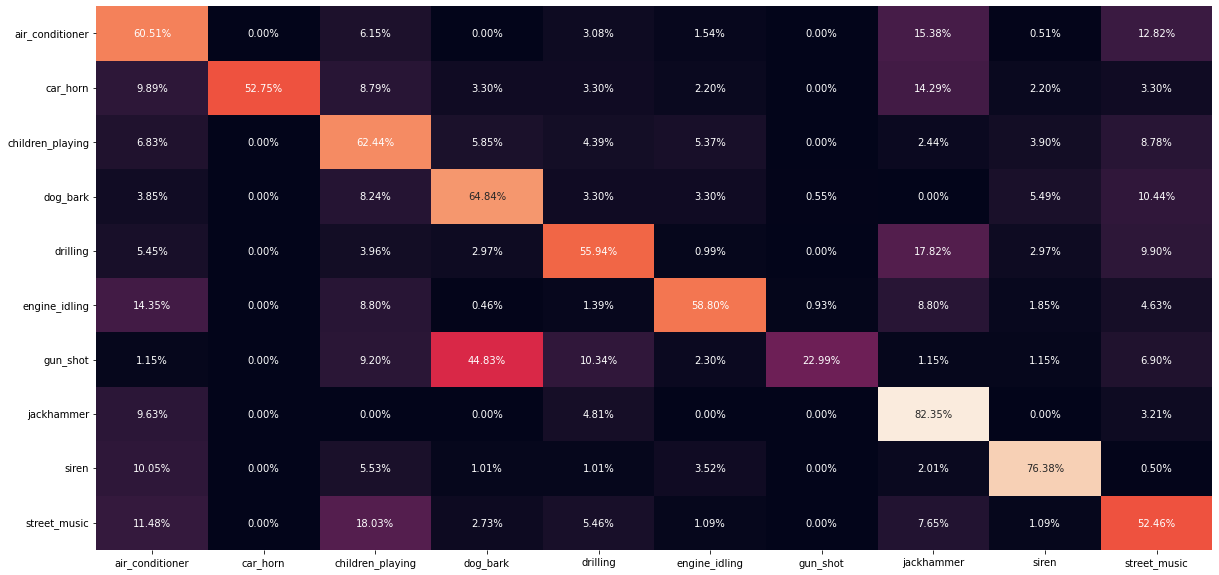

In [12]:
evaluate_model(svc, X_train, y_train, X_test, y_test, classes)

Accuracy: 0.8815111619919863
Precision: 0.895014705717054
Recall: 0.8649797078469323
F1-Score: 0.8763031100537088


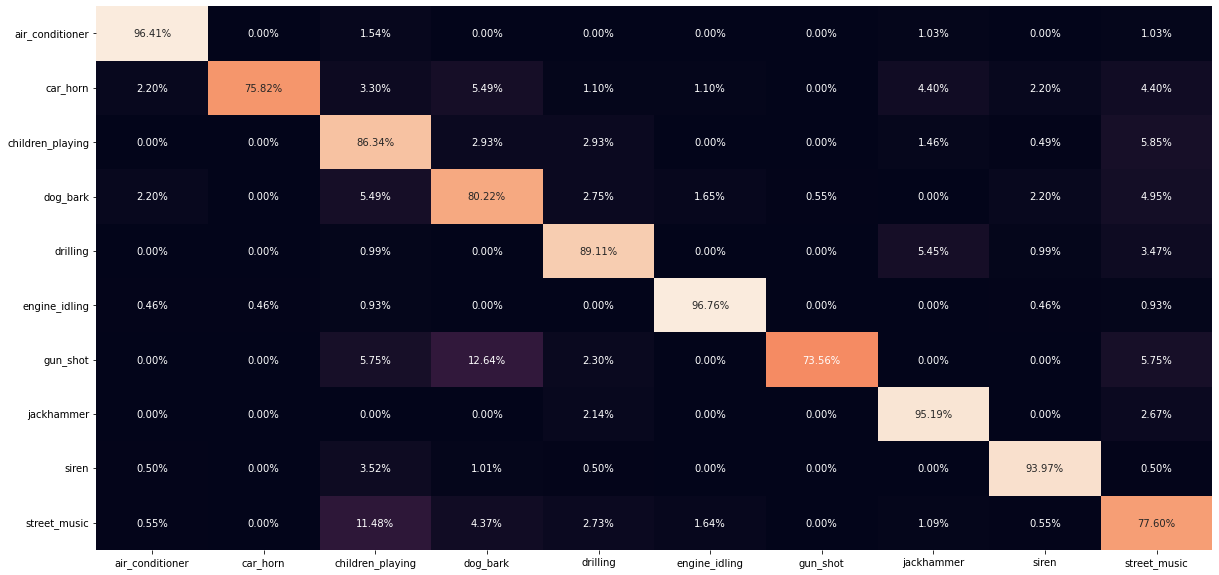

In [13]:
evaluate_model(rf, X_train, y_train, X_test, y_test, classes)

Accuracy: 0.45048654836863194
Precision: 0.462016223521388
Recall: 0.46487096033093145
F1-Score: 0.4598942199515352


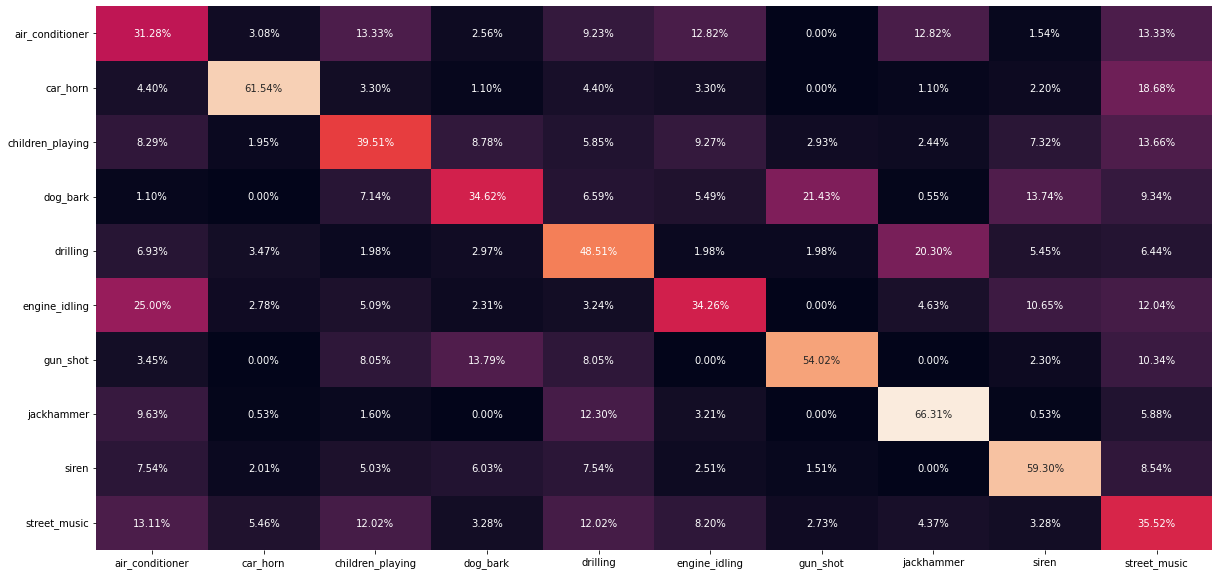

In [14]:
evaluate_model(ada, X_train, y_train, X_test, y_test, classes)

Accuracy: 0.8185460789925587
Precision: 0.8362187403425162
Recall: 0.8038867382985696
F1-Score: 0.8152826337090018


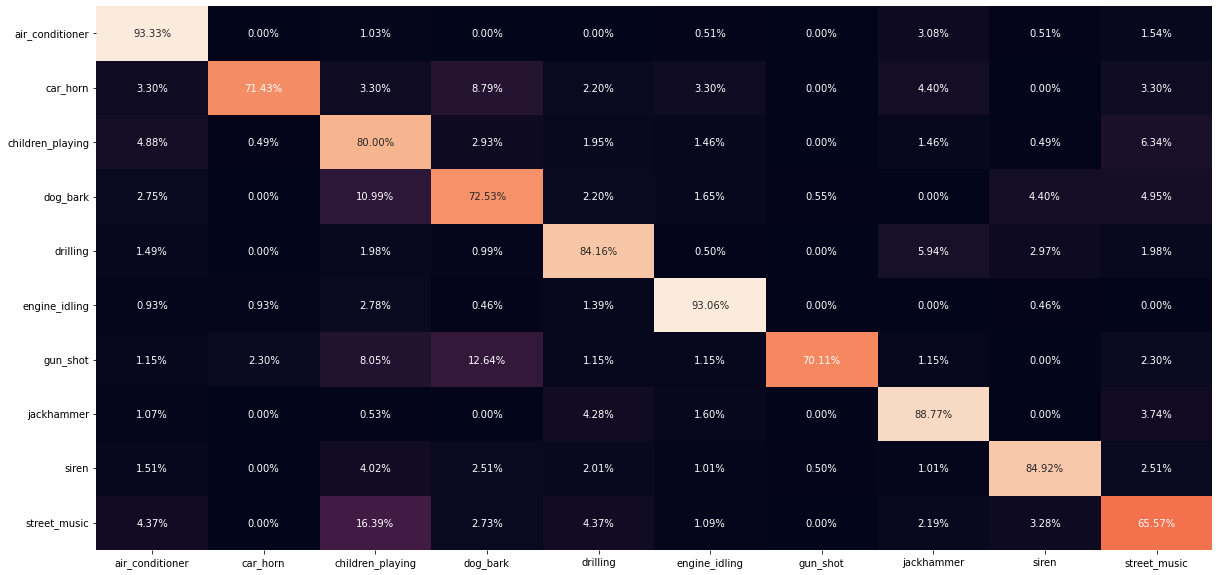

In [15]:
evaluate_model(bag, X_train, y_train, X_test, y_test, classes)